In [4]:
%matplotlib inline

## 決策樹DecisionTree

### Import data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
titanic = pd.read_csv("D:\\Learning Note\\Python\\pythoncode\\Practice\\data\\titanic.csv")

In [31]:
X = df[["pclass","age","sex","embarked"]]
y = df["survived"]

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [39]:
mean = titanic['age'].mean() # 下行需要mean
titanic['age'].fillna(mean, inplace=True) # Pandas allow us to replace them with a fixed value using the fillna method

### Pre-processing
Encoder

In [42]:
#gender
enc = LabelEncoder() #specify model
label_encoder = enc.fit(titanic['sex']) #fit model
integer_sex = label_encoder.transform(label_encoder.classes_) 
gender = label_encoder.transform(titanic['sex'])
titanic['sex'] = gender

In [90]:
print(label_encoder.classes_)

['female' 'male']


In [43]:
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,0
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,0
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),1
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,0
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,1


### One-Hot-Encoder

In [49]:
from sklearn import feature_extraction
# pclass, embarked
def one_hot_dataframe(data, cols, replace=False):
    vec = feature_extraction.DictVectorizer()
    mkdict = lambda row: dict((col, row[col]) for col in cols)
    vecData = pd.DataFrame(vec.fit_transform(data[cols].apply(mkdict, axis=1)).toarray())
    vecData.columns = vec.get_feature_names() # modify column names
    vecData.index = data.index # modify index names
    if replace:
        data = data.drop(cols, axis=1)
        data = data.join(vecData)
    return (data, vecData) # return original data and transformed data

In [44]:
titanic, titanic_n = one_hot_dataframe(titanic, ['pclass','embarked'], replace=True) # titanic_n only contains the previously created columns

In [45]:
titanic.head()

,row.names,survived,name,age,home.dest,room,ticket,boat,sex,embarked,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd
0,1,1,"Allen, Miss Elisabeth Walton",29.0000,"St Louis, MO",B-5,24160 L221,2,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2,0,"Allison, Miss Helen Loraine",2.0000,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3,0,"Allison, Mr Hudson Joshua Creighton",30.0000,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,4,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,5,1,"Allison, Master Hudson Trevor",0.9167,"Montreal, PQ / Chesterville, ON",C22,NaN,11,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [46]:
titanic_target = titanic["survived"]
titanic_data =titanic.drop(['name','embarked', 'row.names', 'survived','home.dest','room','ticket','boat'], axis=1)

In [ ]:
titanic_target

In [48]:
titanic_data.head()

,age,sex,embarked=Cherbourg,embarked=Queenstown,embarked=Southampton,pclass=1st,pclass=2nd,pclass=3rd
0,29.0000,0,0.0,0.0,1.0,1.0,0.0,0.0
1,2.0000,0,0.0,0.0,1.0,1.0,0.0,0.0
2,30.0000,1,0.0,0.0,1.0,1.0,0.0,0.0
3,25.0000,0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.9167,1,0.0,0.0,1.0,1.0,0.0,0.0


### Traing Model

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    titanic_data.values, titanic_target.values, test_size=0.2, random_state=33)

In [71]:
feature_names = titanic_data.columns

In [92]:
titanic_target.names

AttributeError: 'Series' object has no attribute 'names'

In [52]:
from sklearn import tree

In [94]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=3, min_samples_leaf = 5)

In [96]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [97]:
y_pred = clf.predict(X_test)

In [98]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

### evaluation

In [99]:
# accuaacy for train data
from sklearn import metrics

print(metrics.accuracy_score(y_test,y_pred))
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

0.790874524715
             precision    recall  f1-score   support

          0       0.78      0.93      0.85       164
          1       0.82      0.57      0.67        99

avg / total       0.80      0.79      0.78       263

[[152  12]
 [ 43  56]]


In [100]:
feature_names

Index(['age', 'sex', 'embarked=Cherbourg', 'embarked=Queenstown',
       'embarked=Southampton', 'pclass=1st', 'pclass=2nd', 'pclass=3rd'],
      dtype='object')

### Tree image

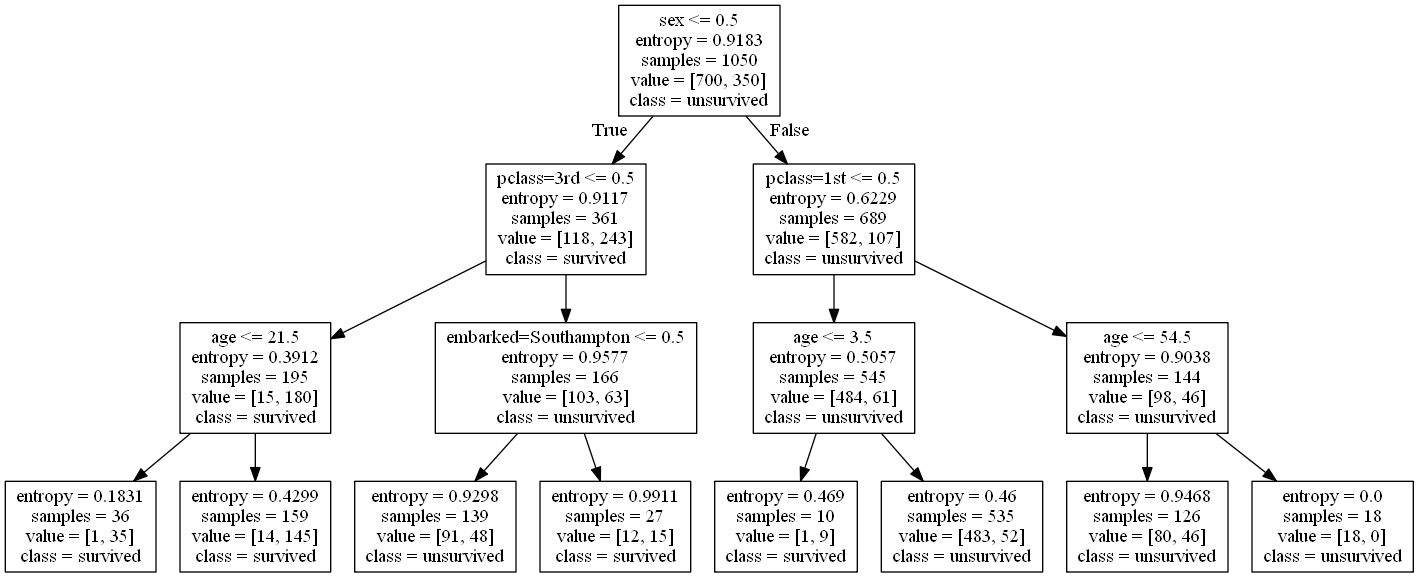

In [102]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names,class_names= ["unsurvived","survived"] ) 
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  